<a href="https://colab.research.google.com/github/prasath9944/ANN_ImPlementation/blob/main/fsds_21_ann_aps_sensor_fault_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [8]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset=pd.read_csv('https://raw.githubusercontent.com/sunnysavita10/deep-learning/main/aps_data.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [11]:
dataset.shape

(5000, 171)

In [12]:
dataset.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [13]:
dataset=dataset.replace('na',np.nan)

In [14]:
dataset.isna().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [15]:
dataset.isna().sum().sum()

71649

In [16]:
pd.options.display.max_rows=171

In [17]:
dataset.isna().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [18]:
pd.DataFrame(dataset.isna().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Counts"})

,Null Value Counts
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [19]:
# Filling null values in features with medain of that features
for feature in [feature for feature in dataset.columns if feature not in ['class']]:
  dataset[feature]=dataset[feature].fillna(dataset[feature].median()) 

In [20]:
pd.options.display.max_rows=10

In [21]:
dataset.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [22]:
dataset.isna().sum().sum()

0

In [23]:
pd.DataFrame(dataset.isna().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Counts"})

,Null Value Counts
class,0
cs_003,0
cn_009,0
co_000,0
cp_000,0
...,...
ba_005,0
ba_006,0
ba_007,0
ba_008,0


In [24]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [25]:
X=dataset.drop('class',axis=1)
y=dataset['class']

In [26]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6,0,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,90,0,0,66,0,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,30,0.0,16,14,0,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,444,0.0,14,12,0,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,82,0.0,12,10,0,0,0,0,1464,4980,...,1010,132,310,56,92,1292,0,0,0,0


In [27]:
y.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [28]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [29]:
y=pd.get_dummies(y,drop_first=True)

In [30]:
#splitting the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [33]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
# importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [35]:
classifier=Sequential()

classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=170))

classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))

classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [36]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_history=classifier.fit(X_train,y_train,batch_size=10,epochs=30,validation_split=0.25)

Epoch 1/30
300/300 [==============================] - 3s 3ms/step - loss: 0.3902 - accuracy: 0.8877 - val_loss: 0.1285 - val_accuracy: 0.9840
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0917 - accuracy: 0.9847 - val_loss: 0.0758 - val_accuracy: 0.9850
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9867 - val_loss: 0.0507 - val_accuracy: 0.9870
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 0.0462 - val_accuracy: 0.9870
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0250 - accuracy: 0.9913 - val_loss: 0.0578 - val_accuracy: 0.9800
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0205 - accuracy: 0.9923 - val_loss: 0.0495 - val_accuracy: 0.9850
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0503 - val_accuracy: 0.9870
Epoch 

In [39]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
model_history.history['accuracy']

[0.887666642665863,
 0.984666645526886,
 0.9866666793823242,
 0.9900000095367432,
 0.9913333058357239,
 0.9923333525657654,
 0.9946666955947876,
 0.9946666955947876,
 0.9946666955947876,
 0.9963333606719971,
 0.9963333606719971,
 0.9956666827201843,
 0.996666669845581,
 0.996999979019165,
 0.9973333477973938,
 0.9980000257492065,
 0.9976666569709778,
 0.9990000128746033,
 0.9983333349227905,
 0.9959999918937683,
 0.9976666569709778,
 0.9986666440963745,
 0.9993333220481873,
 0.9993333220481873,
 0.9993333220481873,
 0.9993333220481873,
 0.999666690826416,
 0.9993333220481873,
 0.9993333220481873,
 0.999666690826416]

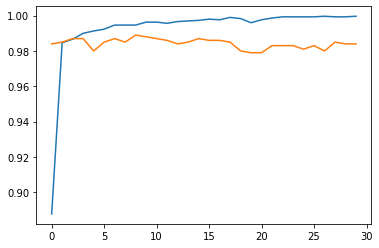

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

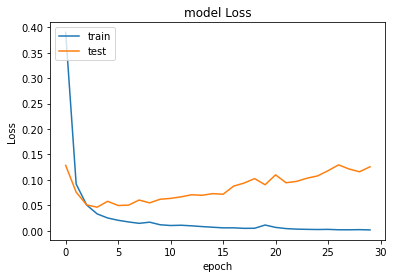

In [42]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

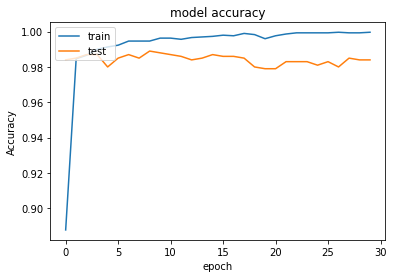

In [43]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [44]:
y_pred=classifier.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [68]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [70]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_01_23_15_13_28_.h5


In [45]:
y_pred=y_pred>0.05

In [46]:
y_test.shape

(1000, 1)

In [47]:
y_pred.shape

(1000, 1)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test,y_pred)

array([[973,  13],
       [  3,  11]])

In [50]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.5 MB/s eta 0:00:00


In [51]:
from kerastuner.tuners import RandomSearch

<ipython-input-51-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [57]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=170))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model


In [58]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault')

In [59]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 03s]
val_accuracy: 0.9890000224113464

Best val_accuracy So Far: 0.9909999966621399
Total elapsed time: 00h 00m 14s


In [60]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [62]:
mymodel=tuner.get_best_models(num_models=1)[0]

In [63]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [64]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [65]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project3',project_name='aps-fault-sensor')

In [66]:
tuner_second.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.9909999966621399

Best val_accuracy So Far: 0.9940000176429749
Total elapsed time: 00h 00m 26s


In [67]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 13,
 'units_0': 128,
 'units_1': 448,
 'learning_rate': 0.001,
 'units_2': 32,
 'units_3': 32,
 'units_4': 32,
 'units_5': 32,
 'units_6': 32,
 'units_7': 32,
 'units_8': 32,
 'units_9': 32,
 'units_10': 32,
 'units_11': 32,
 'units_12': 32}